# HW 6 - Oscillatory Motion and Chaos I

### Name: Mohamed Gamal Zaid
### ID: 201700399

In [317]:
import numpy as np
from numpy.random import randint as rand
import matplotlib.pyplot as plt
import time
from scipy.integrate import odeint
from matplotlib.pyplot import cm


# Problem 3.3

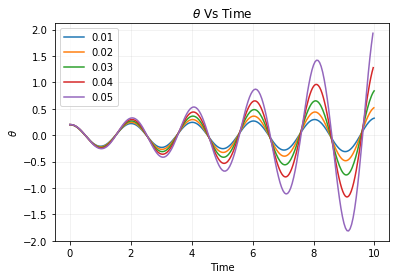

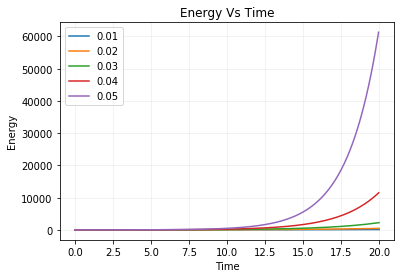

In [318]:
dts = np.round(np.arange(0.01,0.06,0.01),2)
l = 1
g = 9.8
m = 1

fig=plt.figure()
plt.title(r"$\theta$ Vs Time")
for dt in dts:
    t = np.arange(0,10,dt)
    lt = t.size
    ldt = dts.size
    omega = np.zeros(lt)
    theta = np.zeros(lt)
    energy = np.zeros(lt)
    omega[0]=0
    theta[0]=0.2
    energy[0]= 1/2*m*l**2 *(omega[0]**2 + g/l*theta[0]**2)

    for i in range(lt-1):
        omega[i+1] = omega[i]-g/l*theta[i]*dt
        theta[i+1] = theta[i]+omega[i]*dt
    plt.plot(t, theta, label=str(dt))
    
plt.legend(loc='upper left')
plt.xlabel("Time")
plt.ylabel(r"$\theta$")
plt.legend()
plt.grid(alpha=0.2)

fig=plt.figure()
plt.title("Energy Vs Time")
for dt in dts:
    t = np.arange(0,20,dt)
    lt = t.size
    ldt = dts.size
    omega = np.zeros(lt)
    theta = np.zeros(lt)
    energy = np.zeros(lt)
    omega[0]=0
    theta[0]=0.2
    energy[0]= 1/2*m*l**2 *(omega[0]**2 + g/l*theta[0]**2)

    for i in range(lt-1):
        omega[i+1] = omega[i]-g/l*theta[i]*dt
        theta[i+1] = theta[i]+omega[i]*dt
        energy[i+1] = energy[i] + 0.5 * g * l * m * (omega[i]**2 + g/l * theta[i]**2)*dt
    plt.plot(t, energy, label=str(dt))
plt.legend(loc='upper left')
plt.xlabel("Time")
plt.ylabel("Energy")
plt.legend()
plt.grid(alpha=0.2)

# Problem 3.7

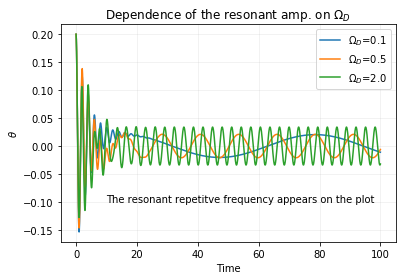

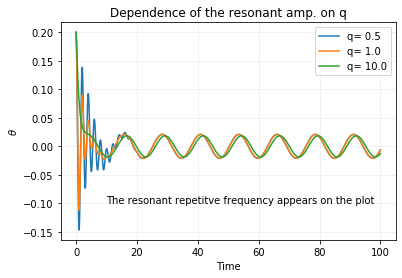

In [319]:
dt = 0.01
t = np.arange(0,100,dt)
lt = t.size
omega = np.zeros(lt)
theta = np.zeros(lt)
#energy = np.zeros(lt)
omega[0]=0
theta[0]=0.2
#energy[0]= 1/2*m*l**2 *(omega[0]**2 + g/l*theta[0]**2)

qs= np.array([0.5,1,10])
q=qs[0]
FD = 0.2

omegaDs = np.array([0.1, 0.5, 2])
#omegaDs = np.array([2])

fig = plt.figure()
plt.title(r"Dependence of the resonant amp. on $\Omega_D$")
    
for j, omegaD in enumerate(omegaDs):
    for i in range(lt-1):
        omega[i+1] = omega[i]-(g/l*(theta[i]) + q * omega[i] - FD*np.sin(omegaD*t[i]))*dt
        theta[i+1] = theta[i]+omega[i+1]*dt
        
        
        if theta[i+1] < -np.pi :
            theta[i+1]+=2*np.pi
        elif theta[i+1] > np.pi :
            theta[i+1]-=2*np.pi
    
    plt.plot(t, theta, label=r'$\Omega_D$='+str(np.round(omegaD,2)))
plt.legend()
plt.text(10,-0.1,"The resonant repetitve frequency appears on the plot")
plt.xlabel("Time")
plt.ylabel(r"$\theta$")
plt.grid(alpha=0.2)


fig = plt.figure()
plt.title(r"Dependence of the resonant amp. on q")
    
omegaD = 0.5
for j, q in enumerate(qs):
    for i in range(lt-1):
        omega[i+1] = omega[i]-(g/l*(theta[i]) + q * omega[i] - FD*np.sin(omegaD*t[i]))*dt
        theta[i+1] = theta[i]+omega[i+1]*dt
        
        
        if theta[i+1] < -np.pi :
            theta[i+1]+=2*np.pi
        elif theta[i+1] > np.pi :
            theta[i+1]-=2*np.pi
    
    plt.plot(t, theta, label=r'q= '+str(np.round(q,2)))
plt.legend()
plt.text(10,-0.1,"The resonant repetitve frequency appears on the plot")
plt.xlabel("Time")
plt.ylabel(r"$\theta$")
plt.grid(alpha=0.2)


# Problem 3.8
$$T=\sqrt{\frac{l}{g}}\Big(1-\dfrac{A^n}{8}\Big)^{-\frac{1}{2}}$$

C:\Users\mogam\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in power


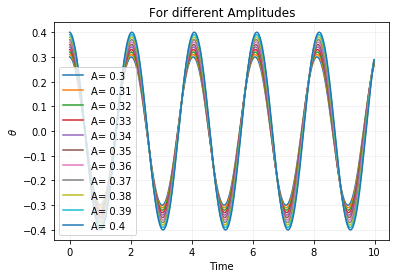

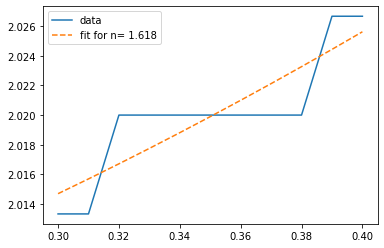

In [320]:
from scipy import optimize 

dt = 0.02
t = np.arange(0,10,dt)
lt = t.size

As = np.arange(0.3,0.41,0.01)
period = []

plt.title("For different Amplitudes")
for A in As:
    omega = np.zeros(lt)
    theta = np.zeros(lt)

    omega[0]=0
    theta[0]=A

    T = []

    st = 0
    
    for i in range(lt-1):
        omega[i+1] = omega[i]-g/l*(theta[i]-np.power(theta[i],3)/3)*dt
        theta[i+1] = theta[i]+omega[i+1]*dt
        if theta[i-1]<0 and theta[i+1]>0:
            en = t[i]
            T.append(en-st)
            st = en
    period.append(np.mean(np.flip(np.sort(T))[:np.int(np.sqrt(len(T)))]))

    plt.plot(t, theta, label = 'A= '+str(np.round(A,3)))
plt.legend()
plt.xlabel("Time")
plt.ylabel(r"$\theta$")
plt.grid(alpha=0.2)


def func(A, n, c):
    return c*np.sqrt(l/g)*np.power((1-np.power(A,n)/8),-0.5)


fig = plt.figure()
plt.plot(As, period, label='data')

popt, pcov = optimize.curve_fit(func,As,period)

plt.plot(As,func(As,*popt),label='fit for n= '+str(np.round(popt[0],3)),ls='--')
plt.legend()
plt.show()
